# 📊 18-Month Seed Inventory Risk Forecast (with Confirmed Shortages)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 18-month dataset with confirmed shortages
df = pd.read_csv("../data/seed_demand_inventory_consolidated_18mo.csv", parse_dates=["Date"])
df.head()

,Date,Virus,Amps,Inventory,Cumulative_Amps_Used,Remaining_Inventory,Shortage
0,2025-05-01,MFB,909,72526,909,71617,False
1,2025-06-01,MFB,926,72526,1835,70691,False
2,2025-07-01,MFB,866,72526,2701,69825,False
3,2025-08-01,MFB,898,72526,3599,68927,False
4,2025-09-01,MFB,817,72526,4416,68110,False


## 📉 Remaining Inventory Over Time (18-Month Forecast)

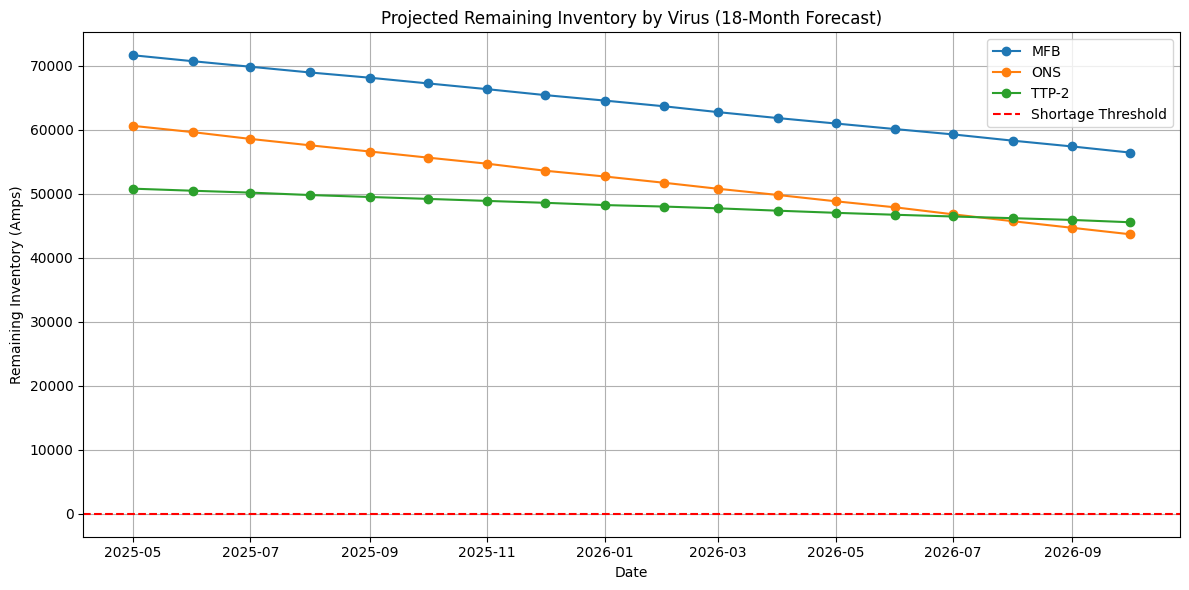

In [11]:
plt.figure(figsize=(12, 6))
for virus in df['Virus'].unique():
    subset = df[df['Virus'] == virus]
    plt.plot(subset['Date'], subset['Remaining_Inventory'], marker='o', label=virus)

plt.axhline(0, color='red', linestyle='--', label='Shortage Threshold')
plt.title("Projected Remaining Inventory by Virus (18-Month Forecast)")
plt.xlabel("Date")
plt.ylabel("Remaining Inventory (Amps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🚨 Forecasted Shortage Dates by Virus

In [12]:
shortages = df[df['Shortage'] == True].copy()

if shortages.empty:
    print("🎉 No forecasted shortages in the 18-month forecast.")
else:
    first_shortage = shortages.groupby('Virus')['Date'].min().reset_index().sort_values('Date')

    plt.figure(figsize=(8, 5))
    sns.barplot(data=first_shortage, y='Virus', x='Date', palette='Reds_r')
    plt.title("First Forecasted Shortage Date by Virus")
    plt.xlabel("Date of Shortage")
    plt.ylabel("Virus Strain")
    plt.tight_layout()
    plt.show()

🎉 No forecasted shortages in the 18-month forecast.


## 🔥 Heatmap of Remaining Inventory Over Time

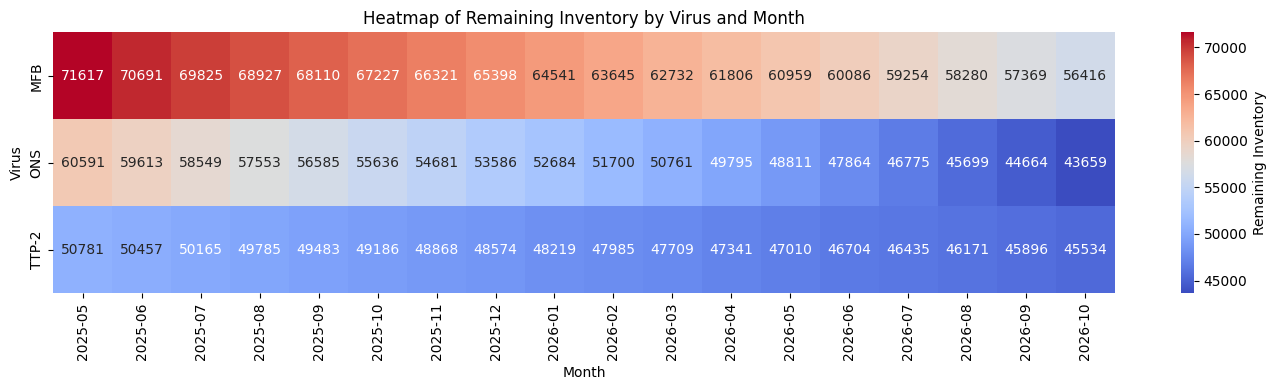

In [13]:
# Prepare data for heatmap
heatmap_df = df.copy()
heatmap_df['Month'] = heatmap_df['Date'].dt.to_period('M').astype(str)
pivot_table = heatmap_df.pivot_table(index='Virus', columns='Month', values='Remaining_Inventory')

# Plot heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Remaining Inventory'})
plt.title("Heatmap of Remaining Inventory by Virus and Month")
plt.xlabel("Month")
plt.ylabel("Virus")
plt.tight_layout()
plt.show()